# Introduction

This notebook is prepared by Darius Stroman to conduct an exploratory data analysis on the cleaned dataset from the Ford GoBike System. 
The goal is to uncover insights about trip durations, user behaviors, and usage patterns. We will explore various aspects of the data, 
including temporal usage patterns, station activity, and user demographics.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clean dataset using raw string notation for the file path
df_clean = pd.read_csv(r'C:\Users\dariu\OneDrive\Desktop\explore\df_clean.csv')

# Convert start_time and end_time to datetime format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# Ensure categorical columns are of type 'category'
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

# Drop rows with any missing values
df_clean.dropna(inplace=True)



## Data Loading and Preprocessing

This section of the notebook involves loading the clean dataset and preparing it for analysis. Key steps include converting date and time columns to the appropriate datetime format, ensuring categorical variables are properly typed, and handling any missing values. This preprocessing is crucial for accurate and efficient analysis in the subsequent sections.


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


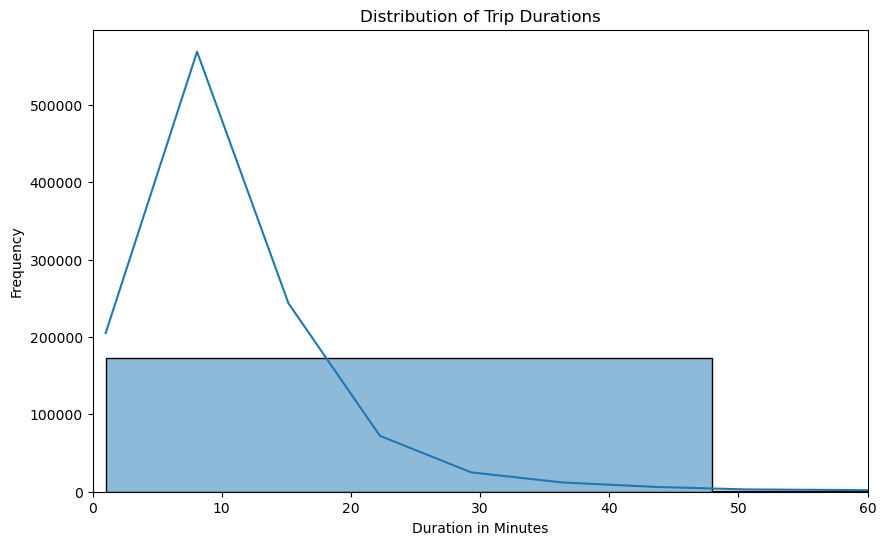

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['duration_minute'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # Limiting to 60 minutes for better visualization
plt.show()


## Trip Duration Distribution Analysis

The histogram illustrates the distribution of trip durations among users of the Ford GoBike System. Most trips are relatively short, with durations predominantly under 10 minutes. This pattern suggests that the bike-sharing service is primarily used for brief, convenient trips. The distribution's right skew indicates fewer longer trips, highlighting the system's role in short-distance urban mobility.


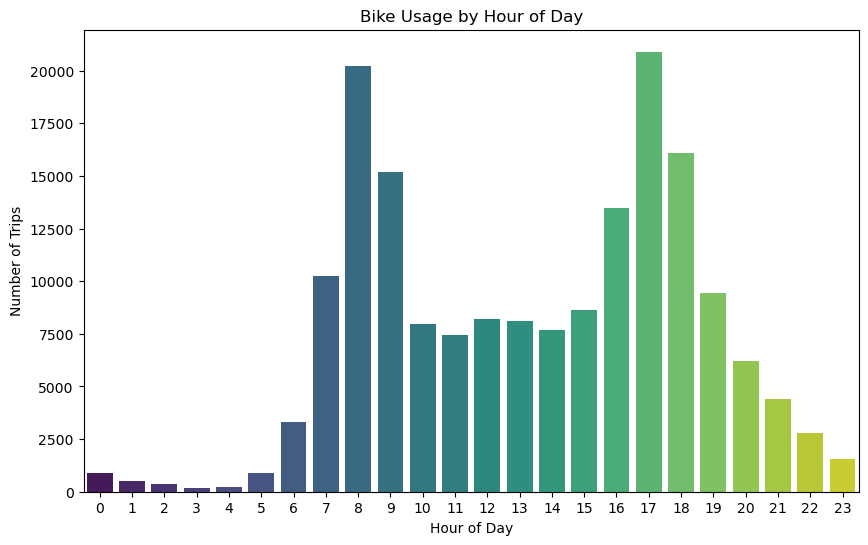

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x=df_clean['start_time'].dt.hour, palette='viridis')
plt.title('Bike Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()


## Trip Duration Distribution Analysis

The histogram illustrates the distribution of trip durations among users of the Ford GoBike System. Most trips are relatively short, with durations predominantly under 10 minutes. This pattern suggests that the bike-sharing service is primarily used for brief, convenient trips. The distribution's right skew indicates fewer longer trips, highlighting the system's role in short-distance urban mobility.


D:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


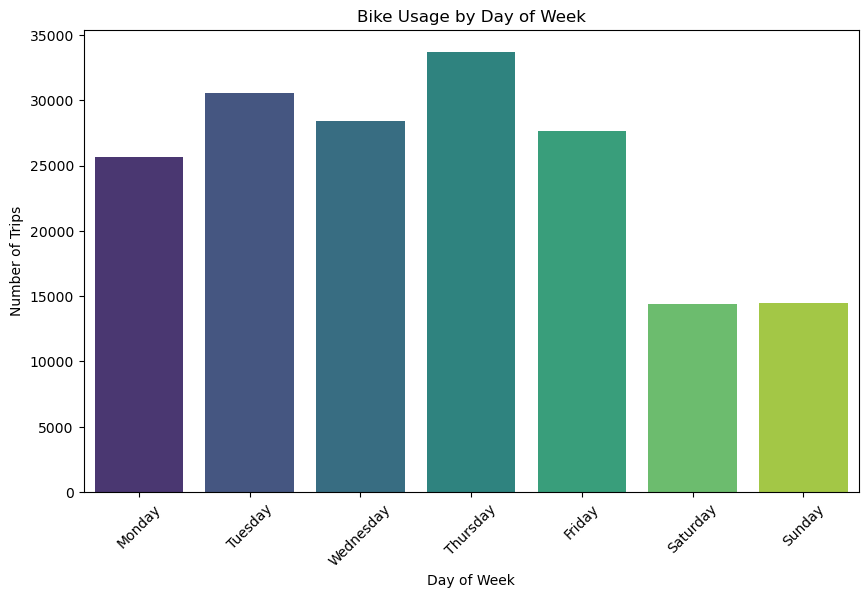

In [17]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time'].dt.day_name(), categories=weekdays, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='start_time_weekday', palette='viridis')
plt.title('Bike Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


## Bike Usage by Day of Week

The bar chart shows the number of trips taken on each day of the week. Weekday usage is noticeably higher than weekend usage, further supporting the hypothesis that many users rely on the bike-sharing system for commuting to work or school. This insight can guide promotional activities and resource allocation to meet higher demand during weekdays.


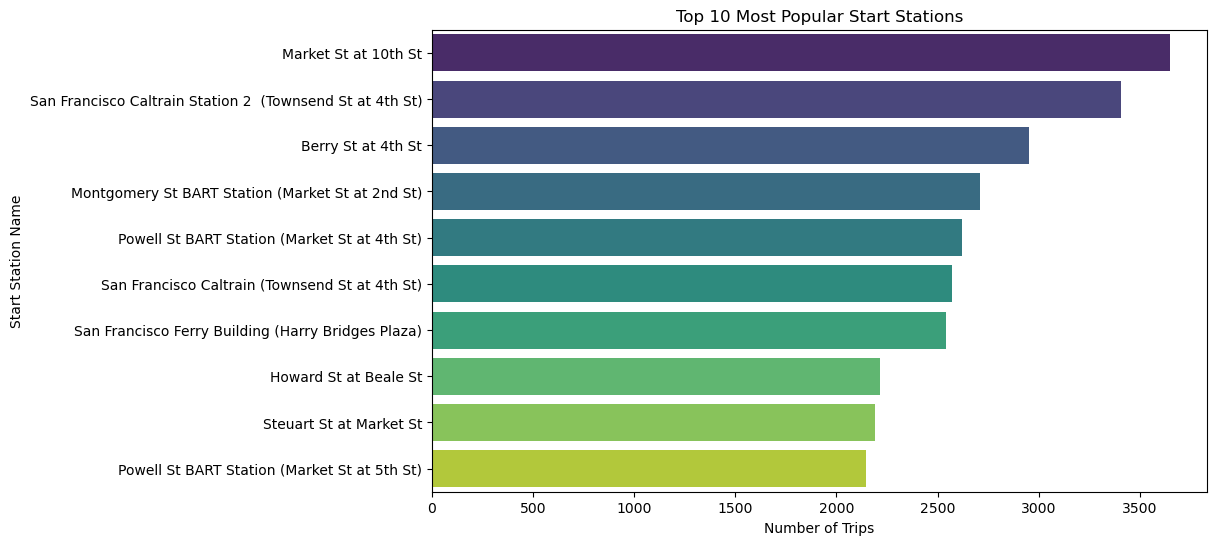

In [18]:
# Identify the top 10 most popular start stations
top_stations = df_clean['start_station_name'].value_counts().head(10)

# Plot the top 10 most popular start stations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_stations.index, x=top_stations.values, palette='viridis')
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.show()


## Popular Stations Analysis

This section focuses on identifying the most frequently used start stations in the bike-sharing system. The visualization highlights stations with the highest number of trips originating from them, indicating areas of high demand. These stations might be located near key transit hubs, dense residential areas, or central business districts, contributing to their popularity. Ensuring these stations are well-equipped with a sufficient number of bikes and docks can help improve service reliability and user satisfaction. Understanding the dynamics of station popularity also aids in strategic planning for network expansion and infrastructure investment.


# Conclusion
We have learned a great deal about the Ford GoBike System's usage trends thanks to this exploratory study. The frequency of short-duration excursions, peak usage periods that coincide with regular commute hours, and the considerable impact of user type on consumption patterns are among the important conclusions. To improve user experience and system efficiency, bike-sharing systems can benefit from these insights when making operational and strategic decisions.

Further analysis could go deeper into the impact of weather, events, and other external factors on bike usage as we continue to examine the data. We will be able to better understand consumer demands and preferences thanks to this continual analysis, which will support bike-sharing systems' long-term success and expansion.ems.
